In [1]:
from models.regex import RegexModel
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface

regex_m = RegexModel()
dataloader = AnnotationDataLoader()



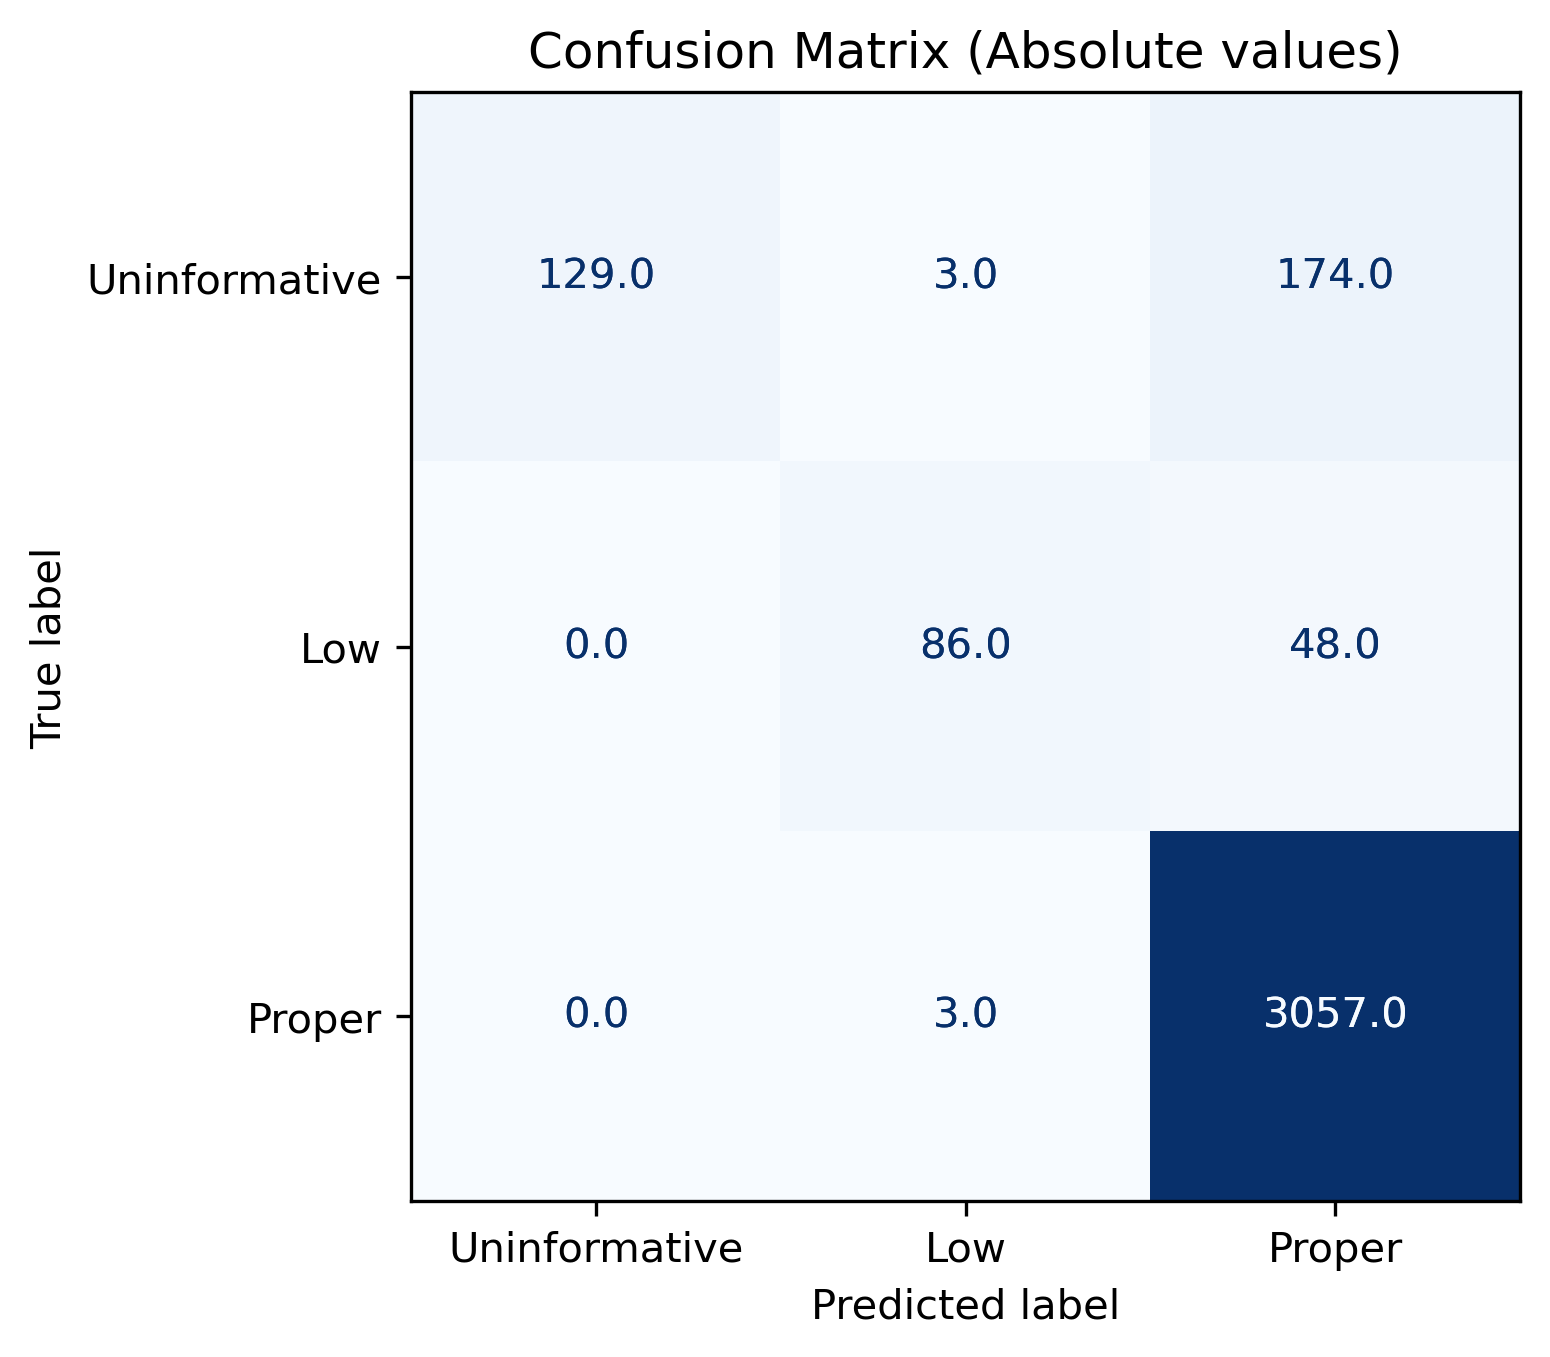
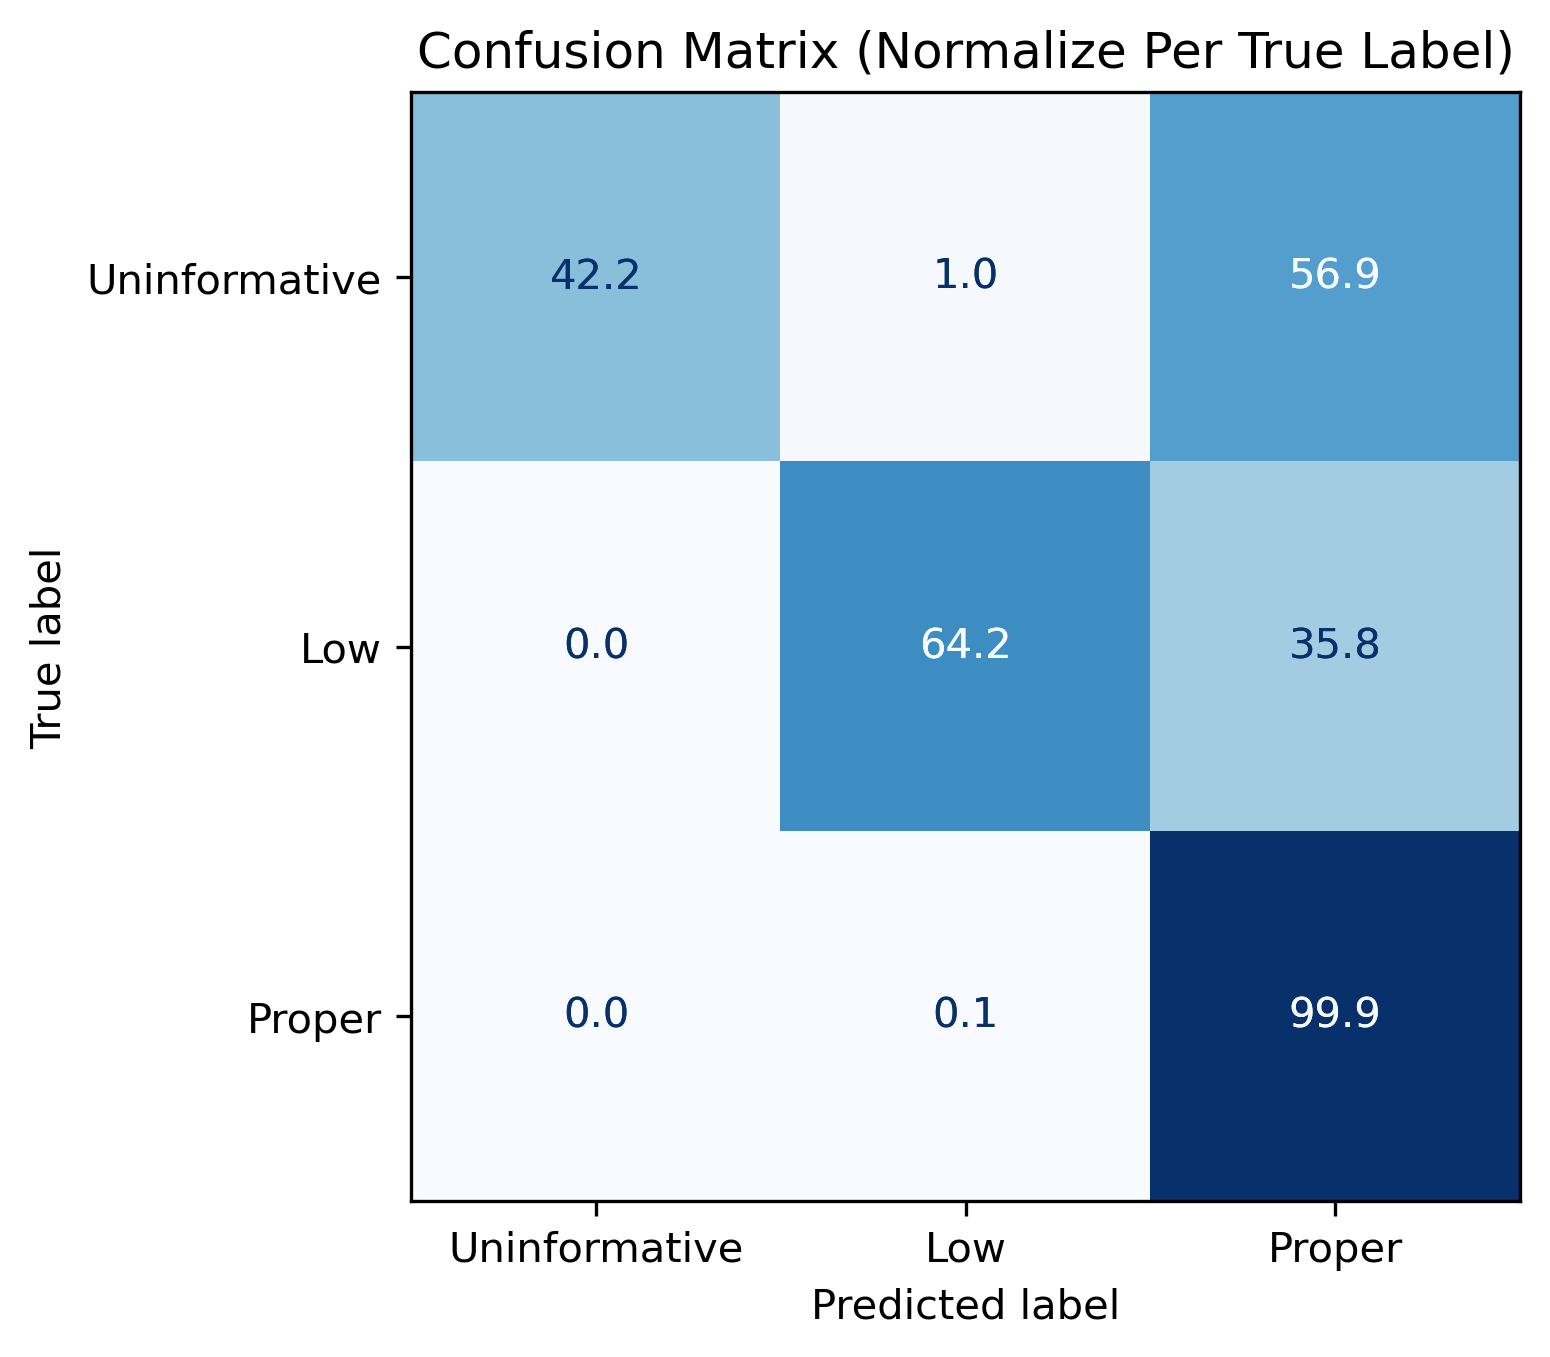

In [ ]:
## Evalute model
regex_m_wrapper = ModelEvalWrapper(regex_m, "Regex", "THe baseline regex classifer")
m = ModelEvaluator(regex_m_wrapper, dataloader.get_train())

c_report = m.generate_report()
c_report.show_report()


In [ ]:
from models.pretrained_embedder.embedder_classifier import EmbedderClassifier
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface


#####	 Report for Model: fembedder	

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        87
           1       1.00      0.87      0.93        39
           2       0.97      0.99      0.98       874

    accuracy                           0.97      1000
   macro avg       0.95      0.87      0.91      1000
weighted avg       0.97      0.97      0.97      1000

The model took 4.83818 seconds to run

Average time per prediction 0.00484 seconds



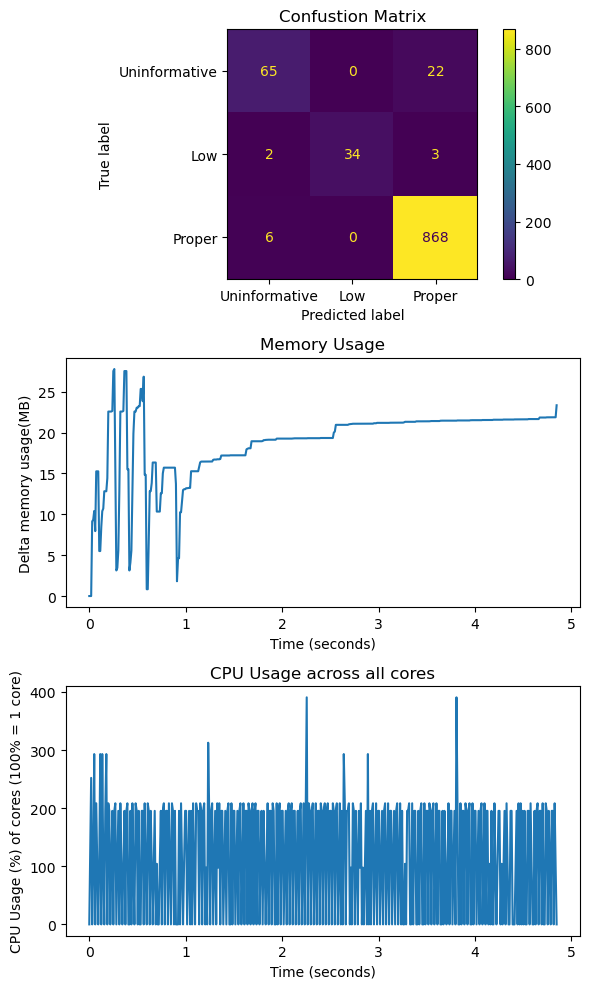

In [5]:

embedder_m = EmbedderClassifier()
dataloader = AnnotationDataLoader()

embedder_m.train(dataloader.get_train())

eval_wrapper =  ModelEvalWrapper(embedder_m, "embedder")
m = ModelEvaluator(eval_wrapper, dataloader.get_validation())
c_report = m.generate_report()
c_report.show_report()



In [19]:
### make the relative imports work in jp
##
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
##
import os
import pandas as pd
from math import isclose
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression


In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
dataloader = AnnotationDataLoader()
train_XY = dataloader.get_train()
embeddings = model.encode(train_XY["X"])
clf = LogisticRegression(max_iter=1000)
clf.fit(embeddings, train_XY["y"])


In [28]:
eval_XY = dataloader.get_validation()
embeddings = model.encode(eval_XY["X"])
preds = clf.predict(embeddings)

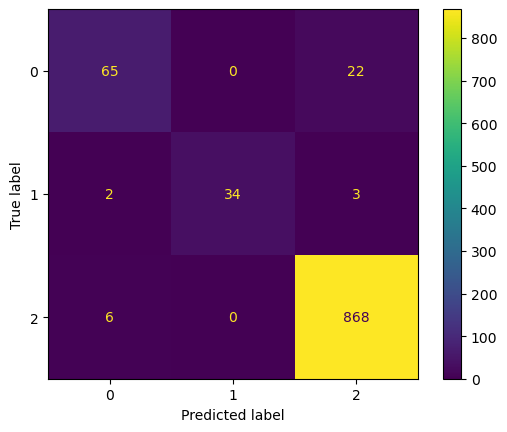

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(eval_XY['y'], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
